## Importing needed libraries

In [1]:
import imageio as iio
import numpy as np
from matplotlib import pyplot as plt

### Reading image

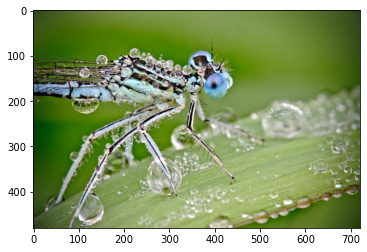

In [2]:
img = iio.imread("q1.jpg")
plt.imshow(img);

### Histograms

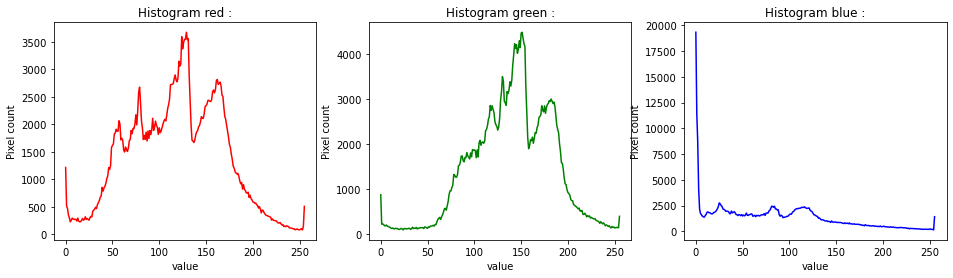

In [3]:
temp = img #image histogram
fig = plt.figure(figsize = (16, 4))
colors = ['red','green','blue']
plt.xlim([0, 256])
for i in range(3):
    ax = plt.subplot(1,3,i+1)
    histogram, bins = np.histogram(temp[:,:,i],bins=256,range=(0,256))
    plt.plot(bins[0:-1], histogram, color=colors[i])
    plt.title("Histogram "+str(colors[i])+" :")
    plt.xlabel("value")
    plt.ylabel("Pixel count");
    extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    plt.savefig("q1_images/hist_"+colors[i][0]+".jpg", bbox_inches=extent.expanded(1.4, 1.3))
    #iio.imwrite("/q1_images/hist_"+color[i][0],)

### Quantization

1038240 1038240


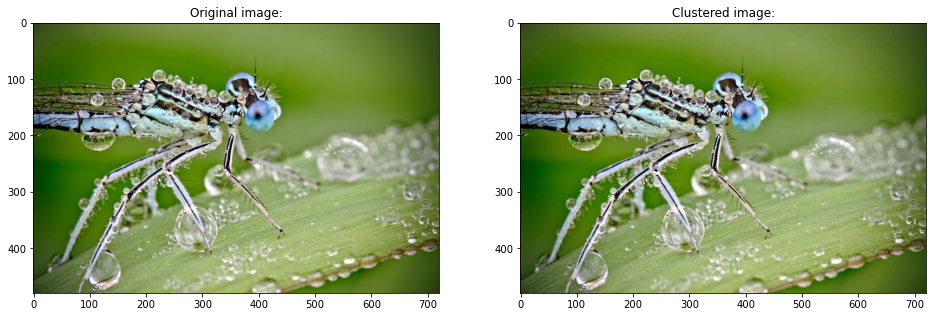

In [4]:
l = 4
clustered = img.copy()
#put each pixel in the middle of sections with length l
clustered[:,:,0] = l*(clustered[:,:,0]//l) + l/2
clustered[:,:,1] = l*(clustered[:,:,1]//l) + l/2
clustered[:,:,2] = l*(clustered[:,:,2]//l) + l/2

plt.figure(figsize=(16,8))
plt.subplot(121)
plt.imshow(img);
plt.title("Original image:")
plt.subplot(122)
plt.imshow(clustered);
plt.title("Clustered image:");
iio.imwrite("q1_images/clustered.jpg",clustered)
print(img.size, clustered.size)

### Clustered Histogram

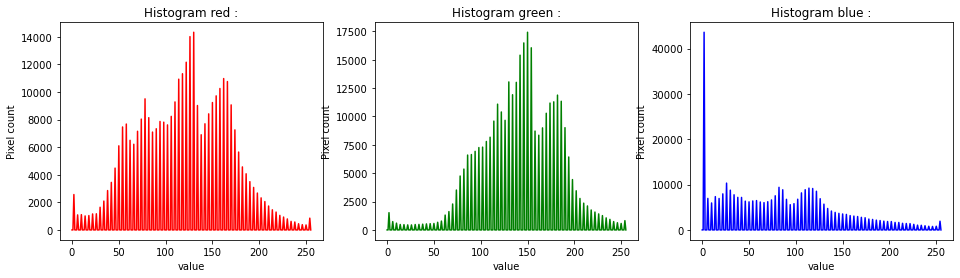

In [5]:
temp = clustered #clutered image histogram
fig = plt.figure(figsize = (16, 4))
colors = ['red','green','blue']
plt.xlim([0, 256])
for i in range(3):
    ax = plt.subplot(1,3,i+1)
    histogram, bins = np.histogram(temp[:,:,i],bins=256,range=(0,256))
    plt.plot(bins[0:-1], histogram, color=colors[i])
    plt.title("Histogram "+str(colors[i])+" :")
    plt.xlabel("value")
    plt.ylabel("Pixel count");
    extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    plt.savefig("q1_images/hist_"+colors[i][0]+"_clus.jpg", bbox_inches=extent.expanded(1.4, 1.3))

### Image size
Fianlly if you cluster your image and assign a single color to every l points with similar colors you end up saving labels and the clustered image must using less space, but it's different story when you save it in the same size array and save it as "uint8", so the final result isn't that diffrent until you save the clustered image in a proper way. (also it might get bigger with higher quantizations and that is because jpg saves the sharpness and those images are less detailed duo to being quantized but are sharper!)